In [423]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### Performing different Machine Learning model for Who Health Data

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Multiple Linear Regression

Two different dataset is use for analysis:
1. Train DataSet : prep0122138_train.csv
2. Test DataSet : prep0122138_test.csv

#### Reading WHO Health Data (Train DataSet)

In [424]:
data = pd.read_csv("prep0122138_train.csv")

# Exploratory Data Analysis

In [425]:
corrData = data.drop(["Life expectancy"], axis=1)

In [426]:
#corrData.corr()

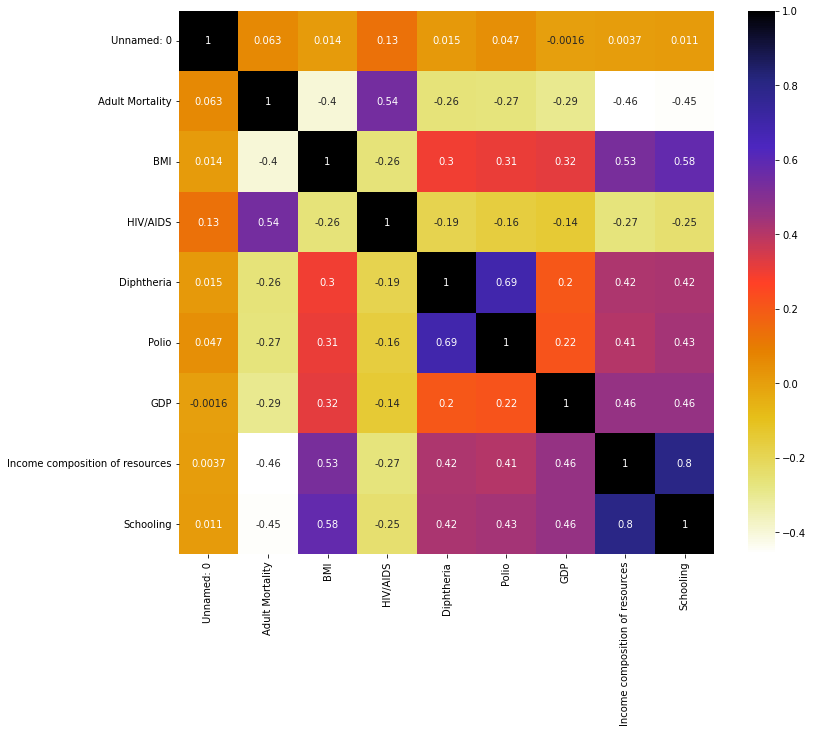

In [427]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = corrData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [428]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [429]:
corr_features = correlation(corrData, 0.57)
len(set(corr_features))

2

In [430]:
corr_features

{'Polio', 'Schooling'}

#### 
1. How many independent variables/features are there in the data set?
Ans : 9

2. How many numerical features are there?
Ans : 8
3. How many categorical features are there?
Ans : 1
4. Which is the third most important feature based on correlation for regression?
Ans : BMI and Schooling (0.58)

5. Which is the least important feature based on correlation for regression?
Ans : Adult Mortality and Income composition of resources (-0.46)



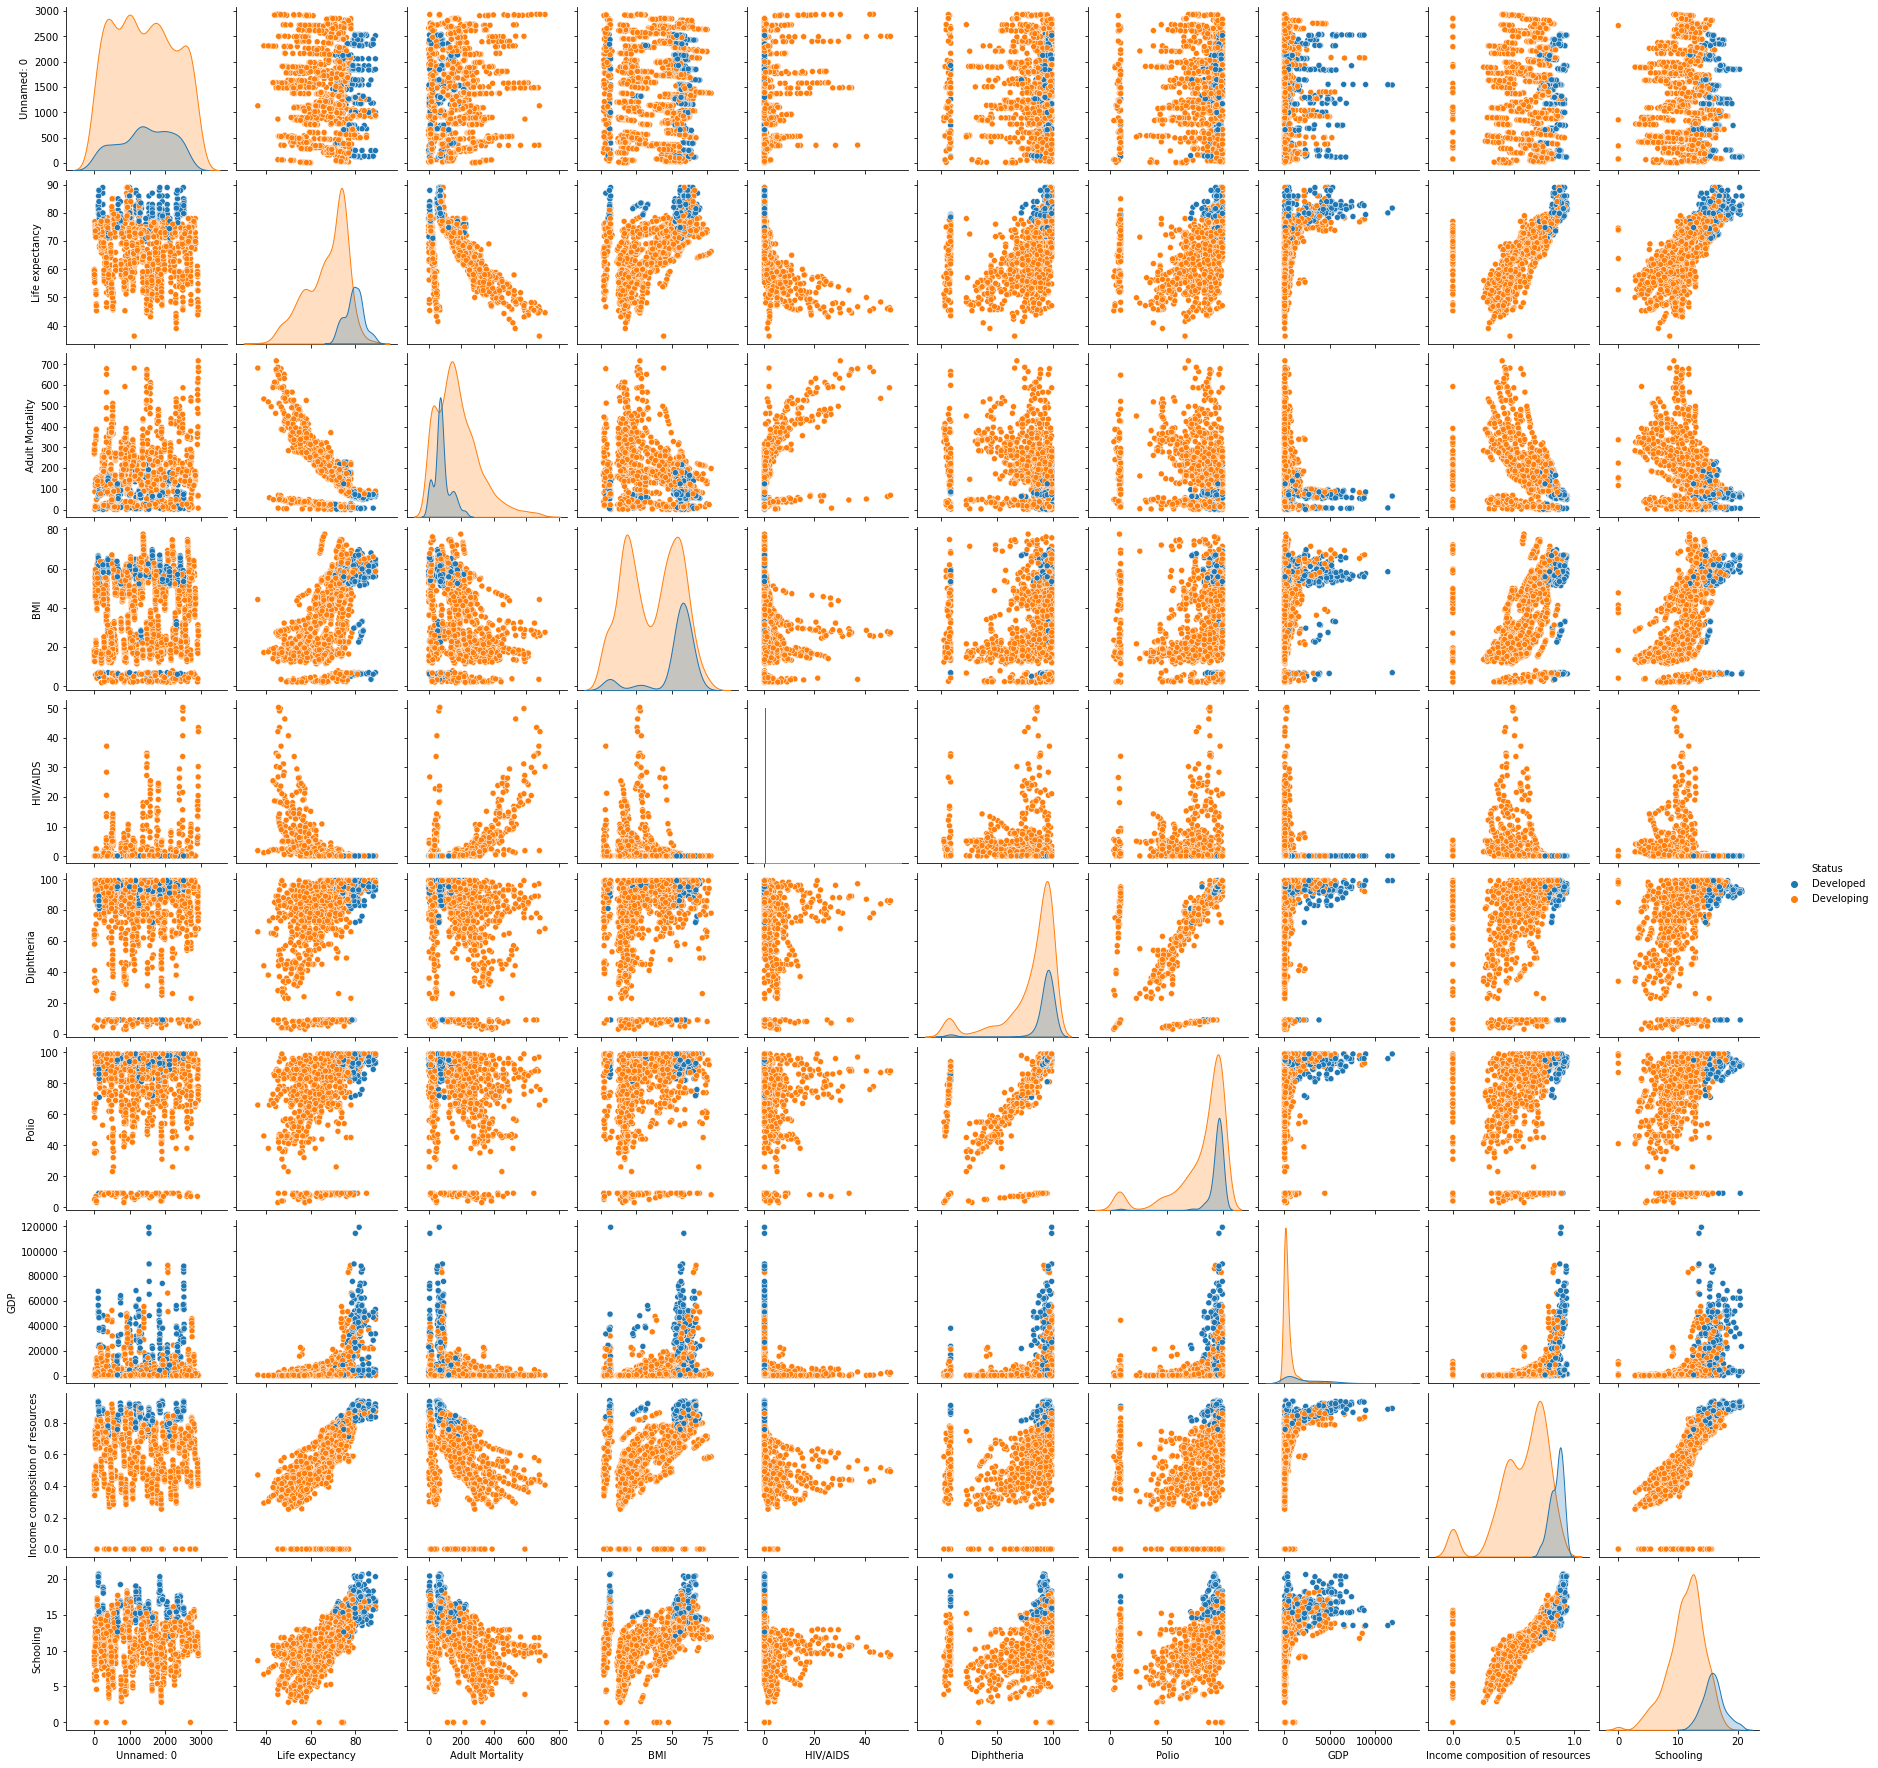

In [432]:
sns.pairplot(data, hue = 'Status')

### Converting WHO Health Data columns (Train DataSet)

In [433]:
data['Life expectancy_Binary'] = np.where(data['Life expectancy']>=65, True, False)
data['Status_binary'] = np.where(data['Status']=='Developed', 1, 0)

In [434]:
X = data.drop(['Unnamed: 0', 'Status', 'Life expectancy', 'Life expectancy_Binary'], axis =1) 
y = data['Life expectancy_Binary']

#### Reading WHO Health Data (Test DataSet)

In [435]:
data_Test = pd.read_csv("prep0122138_test.csv")

In [436]:
data_Test['Life expectancy_Binary'] = np.where(data_Test['Life expectancy']>=65, True, False)
data_Test['Status_binary'] = np.where(data_Test['Status']=='Developed', 1, 0)

In [437]:
X_test_dataset = data_Test.drop(['Unnamed: 0', 'Status', 'Life expectancy', 'Life expectancy_Binary'], axis =1) 
y_test_dataset = data_Test['Life expectancy_Binary']

# Decision Tree for Train DataSet

In [438]:
cdt = DecisionTreeClassifier()

#### Prediction for Train dataset

In [439]:
cdt.fit(X, y)
pred = cdt.predict(X)

#### Accuracy score for Train dataset

In [440]:
print('Train dataset Model accuracy score  : {0:0.4f}'. format(accuracy_score(y, pred)))

Train dataset Model accuracy score  : 1.0000


#### Confusion matrix for Train dataset

In [441]:
Conf_matrix = pd.DataFrame(confusion_matrix(y, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,488,0
Actual Positive,0,1276


#### Classification Report for Train dataset

In [442]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       488
        True       1.00      1.00      1.00      1276

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764



In [443]:
def gini(temp):
    """Calculate the Gini Impurity for a dataframe.
    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = temp['Life expectancy_Binary'].value_counts().to_dict()
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(temp))
        impurity -= prob_of_lbl**2
    return impurity

In [444]:
from math import e
  

""" Usage: pandas_entropy(df['column1']) """

def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = e if base is None else base
    return -(vc * np.log(vc)/np.log(base)).sum()

#### Gini impurity for Train dataset

In [445]:
print('Gini impurity for Train Data : ', gini(data))

Gini impurity for Train Data :  0.40022418642438085


#### Entropy

In [446]:
pandas_entropy(data['Life expectancy_Binary'])

0.5897556934835292

In [447]:
import pickle
pickle.dump(cdt, open('DecisionTree.sav', 'wb'))

# Decision Tree for Test DataSet

In [448]:
DTC = pickle.load(open('DecisionTree.sav', 'rb'))

In [449]:
pred = DTC.predict(X_test_dataset)

#### Accuracy Score Report for Test dataset

In [450]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test_dataset, pred)))

Model accuracy score : 0.9637


#### Confusion Matrix for Test dataset

In [451]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test_dataset, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,112,8
Actual Positive,8,313


#### Classification Report for Test dataset

In [452]:
print(classification_report(y_test_dataset, pred))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93       120
        True       0.98      0.98      0.98       321

    accuracy                           0.96       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.96      0.96      0.96       441



#### Gini impurity for Test dataset

In [453]:
print('Gini impurity for Test Data : ', gini(data_Test))

Gini impurity for Test Data :  0.3961312416122911


#### Entropy

In [454]:
pandas_entropy(data_Test['Life expectancy_Binary'])

0.5853450803026723

# Random Forest for Train dataset

In [455]:
rfc = RandomForestClassifier()

#### Prediction for Train dataset

In [456]:
rfc.fit(X, y)
pred = rfc.predict(X)

#### Accuracy Score for Train dataset

In [457]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y, pred)))

Model accuracy score : 1.0000


#### Confusion Matrix for Train dataset

In [458]:
Conf_matrix = pd.DataFrame(confusion_matrix(y, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,488,0
Actual Positive,0,1276


#### Classification Report for Train dataset

In [459]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       488
        True       1.00      1.00      1.00      1276

    accuracy                           1.00      1764
   macro avg       1.00      1.00      1.00      1764
weighted avg       1.00      1.00      1.00      1764



In [460]:
import pickle
pickle.dump(rfc, open('RandomForestClassifier.sav', 'wb'))

# Random Forest for Test dataset

In [461]:
RFC = pickle.load(open('RandomForestClassifier.sav', 'rb'))

#### Prediction for Test dataset

In [462]:
pred = RFC.predict(X_test_dataset)

#### Accuracy Score for Test dataset

In [463]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test_dataset, pred)))

Model accuracy score : 0.9773


#### Confusion Matrix for Test dataset

In [464]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test_dataset, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,116,4
Actual Positive,6,315


#### Classification for Test dataset

In [465]:
print(classification_report(y_test_dataset, pred))

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       120
        True       0.99      0.98      0.98       321

    accuracy                           0.98       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.98      0.98      0.98       441



# Logistic Regression for Train Dataset

In [466]:
lr = LogisticRegression()

#### Prediction for Train Dataset

In [467]:
lr.fit(X,y)
pred = lr.predict(X)

C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Accuracy Score for Train dataset

In [468]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y, pred)))

Model accuracy score : 0.9490


#### Confusion Matrix for Train dataset

In [469]:
Conf_matrix = pd.DataFrame(confusion_matrix(y, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,430,58
Actual Positive,32,1244


#### Classification for Train dataset

In [470]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

       False       0.93      0.88      0.91       488
        True       0.96      0.97      0.97      1276

    accuracy                           0.95      1764
   macro avg       0.94      0.93      0.94      1764
weighted avg       0.95      0.95      0.95      1764



In [471]:
import pickle
pickle.dump(lr, open('LogisticRegression.sav', 'wb'))

# Logistic Regression for Test Dataset

In [472]:
logir = pickle.load(open('LogisticRegression.sav', 'rb'))

#### Prediction for Test Dataset

In [473]:
pred = logir.predict(X_test_dataset)

#### Accuracy Score for Test dataset

In [474]:
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test_dataset, pred)))

Model accuracy score : 0.9478


#### Confusion Matrix for Test dataset

In [475]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test_dataset, pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,107,13
Actual Positive,10,311


#### Classification for Test dataset

In [476]:
print(classification_report(y_test_dataset, pred))

              precision    recall  f1-score   support

       False       0.91      0.89      0.90       120
        True       0.96      0.97      0.96       321

    accuracy                           0.95       441
   macro avg       0.94      0.93      0.93       441
weighted avg       0.95      0.95      0.95       441



# Multiple Linear Regression for Train dataset

In [477]:
X = data.drop(['Unnamed: 0', 'Status', 'Life expectancy', 'Life expectancy_Binary'], axis =1) 
y = data['Life expectancy']

#### StandarScales

In [478]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X)

# transform train and test sets
X_scaled = scaler.transform(X)


In [479]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Effect of Scaling

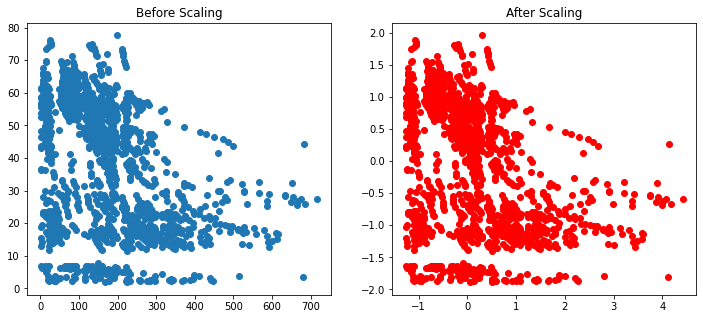

In [480]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X['Adult Mortality'], X['BMI'])
ax1.set_title("Before Scaling")
ax2.scatter(X_scaled['Adult Mortality'], X_scaled['BMI'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [481]:
linear_r = LinearRegression()

In [482]:
linear_r.fit(X_scaled, y)

LinearRegression()

#### Prediction for Train dataset

In [483]:
y_pred = linear_r.predict(X_scaled)

#### MAE, MSR, RMSE, R2 Score for Train dataset

MAE : 2.911031737888456
MSR :  15.53337643756848
RMSE :  3.941240469391392
R2 Score :  0.8323005081457829


C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

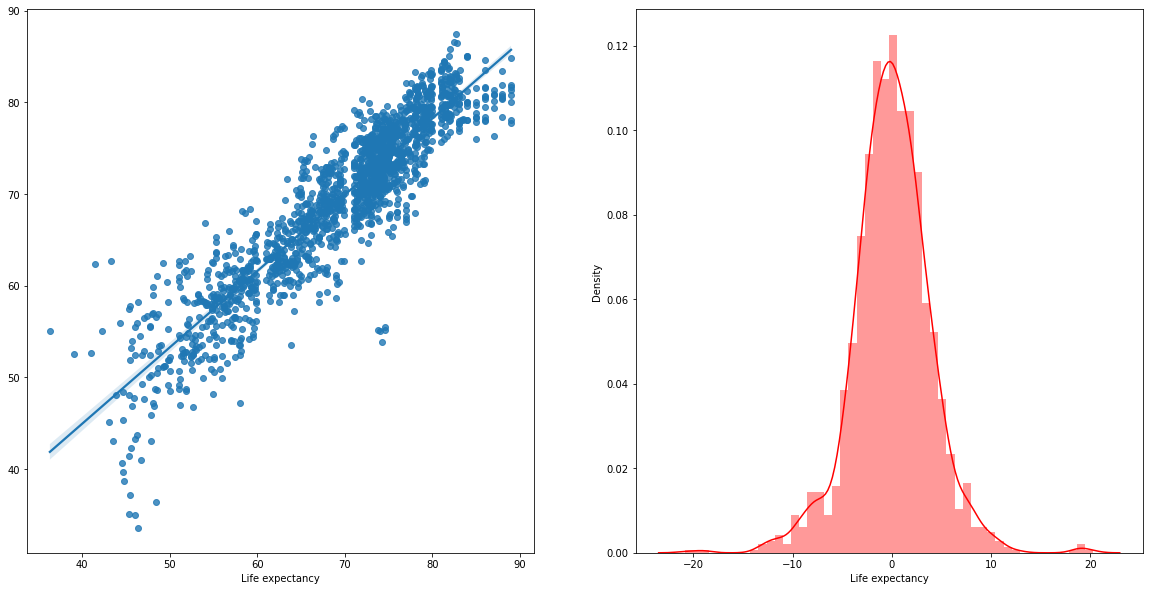

In [484]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("MAE :", mean_absolute_error(y,y_pred))
print('MSR : ', mean_squared_error(y,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y,y_pred)))
print('R2 Score : ', r2_score(y,y_pred))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y, y = y_pred,ax = axes[0])
sns.distplot((y-y_pred),ax = axes[1], color='red')

In [485]:
import pickle
pickle.dump(linear_r, open('MultipleLinearRegression.sav', 'wb'))

#### Multiple Linear Regression for Test Data 

In [486]:
mlr = pickle.load(open('MultipleLinearRegression.sav', 'rb'))

In [487]:
X_test_dataset = data_Test.drop(['Unnamed: 0', 'Status', 'Life expectancy', 'Life expectancy_Binary'], axis =1) 
y_test_dataset = data_Test['Life expectancy']

In [488]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_test_dataset)

# transform train and test sets
X_scaled = scaler.transform(X_test_dataset)

In [489]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Prediction for Test dataset

In [490]:
y_pred = mlr.predict(X_scaled)

#### MAE, MSR, RMSE, R2 Score for Test dataset

MAE : 2.9578221307512247
MSR :  15.859547251339109
RMSE :  3.982404707125973
R2 Score :  0.824817440809305


C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

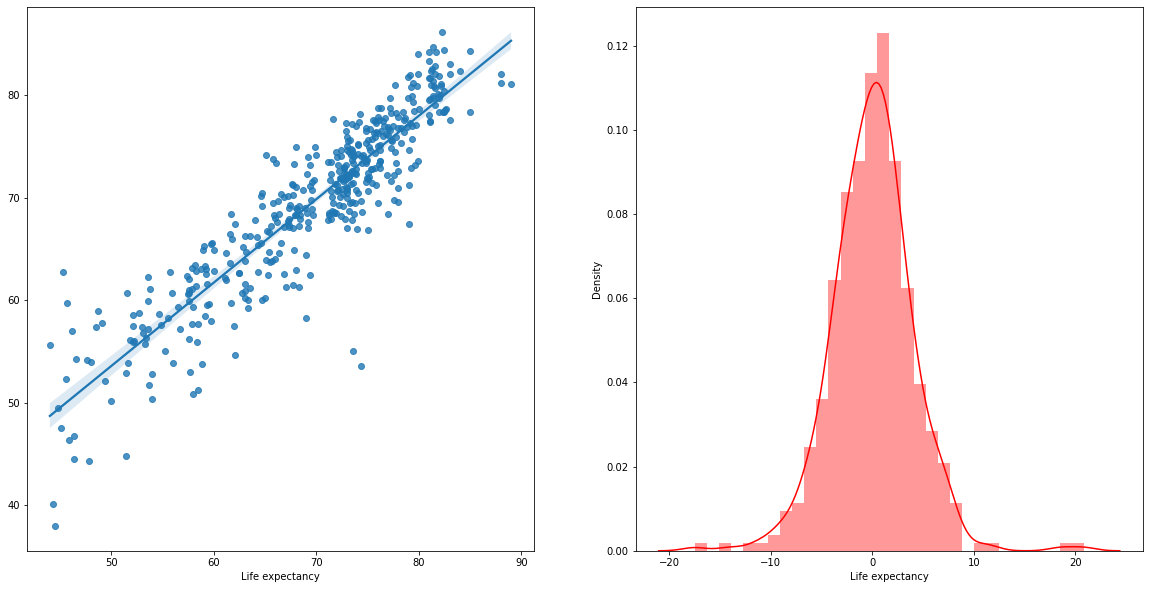

In [491]:
print("MAE :", mean_absolute_error(y_test_dataset,y_pred))
print('MSR : ', mean_squared_error(y_test_dataset,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test_dataset,y_pred)))
print('R2 Score : ', r2_score(y_test_dataset,y_pred))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y_test_dataset, y = y_pred,ax = axes[0])
sns.distplot((y_test_dataset-y_pred),ax = axes[1], color='red')

## mean_squared_error and R2 for the test dataset after we take top 5 features based on correlation

In [492]:
X_top5 = data_Test[['Adult Mortality', 'BMI', 'HIV/AIDS', 'Polio', 'Income composition of resources']]
y = data_Test["Life expectancy"]

In [493]:
scaler.fit(X_top5)

# transform train and test sets
X_top5_scaled = scaler.transform(X_top5)

In [494]:
X_top5_scaled = pd.DataFrame(X_top5_scaled, columns=X_top5.columns)

In [495]:
lr_top5 = LinearRegression()

In [496]:
lr_top5.fit(X_top5_scaled,y)

LinearRegression()

In [497]:
y_pred = lr_top5.predict(X_top5_scaled)

MAE : 3.29404967279128
MSR :  20.59488410363252
RMSE :  4.5381586688471485
R2 Score :  0.7725115070226563


C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

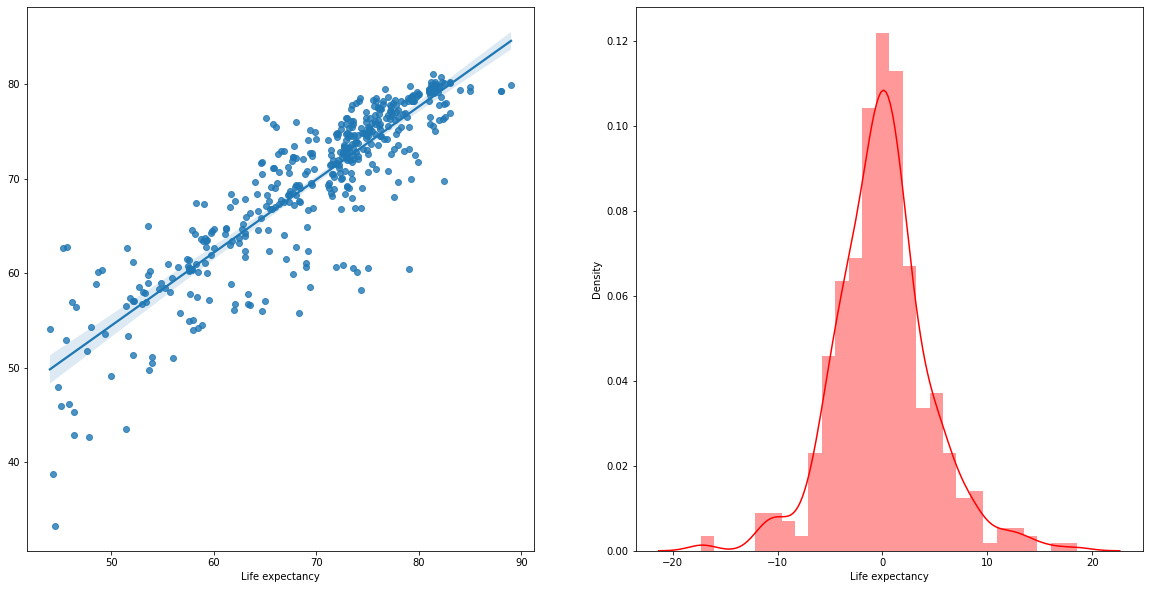

In [498]:
print("MAE :", mean_absolute_error(y,y_pred))
print('MSR : ', mean_squared_error(y,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y,y_pred)))
print('R2 Score : ', r2_score(y,y_pred))
f, axes = plt.subplots(1,2,figsize=(20,10))
sns.regplot(x = y, y = y_pred,ax = axes[0])
sns.distplot((y-y_pred),ax = axes[1], color='red')

## a. Case 1
i. Status=Developing
ii. Adult Mortality = 730
iii. BMI = 27
iv. HIV/AIDS = 33
v. Diphtheria=70
vi. Polio =60
vii. GDP=450
viii. Income composition of resources = 0.35
ix. Schooling=10


In [499]:
X_test_dataset.columns

Index(['Adult Mortality', 'BMI', 'HIV/AIDS', 'Diphtheria', 'Polio', 'GDP',
       'Income composition of resources', 'Schooling', 'Status_binary'],
      dtype='object')

In [500]:
X = np.array([730, 27, 33, 70, 60, 450, 0.35, 10, 0]).reshape(1,9)

In [501]:
scaler.fit(X)

X_scaled = scaler.transform(X)

In [502]:
y_pred = mlr.predict(X)

C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [503]:
y_pred

array([-1164.40344781])

## b. Case 2
i. Status=Developed
ii. Adult Mortality = 100
iii. BMI = 20
iv. HIV/AIDS = 1
v. Diphtheria=7
vi. Polio =6
vii. GDP=4500
viii. Income composition of resources = 0.5
ix. Schooling=12

In [504]:
X = np.array([100, 20, 1, 7, 6, 4500, 0.5, 12, 1]).reshape(1,9)

In [505]:
y_pred = mlr.predict(X)

C:\Users\Avinash Chanchal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [506]:
y_pred

array([2549.80790595])